# Diabetes Study Case

**Source of the data**\
Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

## 1. Business Understanding

The objective of this work is to create a Machine Learning Model that is going to classify a patient-hospital outcome in 3 different categories as follows:
1. No readmission
2. A readmission in less than 30 days
3. A readmission in more than 30 days

This is going to allow the hospitals to know in advanced if a patient is likely going to be treated again in the hospital and it might even be useful to identify what specific aspects of the patients or the treatment reduce the probabilites of a readmission.

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

**Something important to consider in the development of this project is that there are some big restrictions related to the dealine and the computer resources to work with. Therefore it will not be possible to make all the iterations needed to try out all possibilities in the data preparation and modeling stages. However the idea will be to create an initial pipeline that will allow to get a very first competent model that might be enhanced in the future.**

## 2. Data Understanding

The availables fields in the dataset are as follows:
- **encounter_id**: Unique identifier of an encounter.
- **patient_nbr**: Unique identifier of a patient.
- **race**: Race of the patient.
- **gender**: Gender of the patient.
- **age**: Age  of the patient grouped in 10-years intervals.
- **weight**: Weight in pounds.
- **admission_type_id**: Integer identifier corresponding to admission type values such as:emergency, urgent, newborn, etc.
- **discharge_disposition_id**: Integer identifier corresponding to discharge position  values such as: discharged to home, expired, etc.
- **admission_source_id**: Integer identifier corresponding to admission source values such as: physicial referral, emergency room, transfer from a hospital, etc.
- **time_in_hospital**: Integer number of days between admission and discharge.
- **payer_code**: Integer identifier corresponding to payer code values such as Blue Cross, Medicare, self-pay, etc.
- **medical_specialty**: Integer identifier corresponding to medical specialty values such as: cardiology, internal medicine, family, etc.
- **numb_lab_procedures**: Number of procedures (othger than lab tests) performed during the encounter.
- **num_medications**: Number of distinct generic names  administered during the encounter.
- **number_outpatient**: Number of outpatient visits of the patient in the year preceding the encounter.
- **number_emergency**: Number of emergency visits of the patient in the year preceding the encounter.
- **number_outpatient**: Number of inpatient visits of the patient in the year preceding the encounter.
- **diag_1**: The primary diagnosis (coded as first three digits of ICD9).
- **diag_2**: Secondary diagnosis (coded as first three digits of ICD9).
- **diag_3**: Aditional secondary diagnosis (coded as first three digits of ICD9).
- **number_diagnoses**: Number of diagnoses entered to the system
- **max_glu_serum**: indicates the range of the result or if the test was not taken.
- **A1Cresult**: indicates the range of the result of if the test was not taken.
- **change**: Indicates if there was a change in diabetic medications.
- **diabetesMed**: Indicates if there was any diabetic medication
- **24 features of medications**: 24 variables of differents medications, each feature indicates if the specific drug was prescribed or there was a change in the dosage.
- **Readmitted**: days to inpatient readmission.<30, >30 or No for no record of readmission. **(Target Variable)**



## Exploratory analysis

In [1]:
# Import the required Libraries for exploratory analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Library to ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
import pandas as pd
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [3]:
# Check the structure of the dataset
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


what we can see in the last table is that there are some **?** signs in the data, this seems to  represent  some missing values.

In [4]:
#Check column names
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
#Check some basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

According to the last information, the data does not have missing values, as we see before, it seems that the missing representation is ? for some fields. for the sake of the following analysis. we will replace the sign character for an actual NAN value represented in Python.

In [6]:
#replace ? signs for nan values
df.replace('?',np.nan,inplace=True)

In [7]:
# check some statistical info about numeric variables
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Analyzing the last table we can see that some of the statistics does not make any sense due to the fact that  some variables despite of being represented as numbers are categorical variables. For that reason, variables such as encounter_id, patient_nbr, admissiong_type_id, discharge_disposition_id, admission_source_id could be not be treated as numeric variables and this statistics values are not useful. 

### Variables Analysis

In order to analyze more deeply every single variable for getting some insights from them. In the next cells, we will use some auxiliar functions to do some calculations and plot certain graphs. This will allow us to understand the details of each field in order to make decisions in the data preparation process.

#### Auxiliar functions for exploratory analysis

In [8]:
# Create auxiliar functions to help in the exploratory analysis

def get_info_table(df,col,num_flag = False):
    '''
    returns a table that calculate the percentage of the  missing values and the numbers of 
    distinct categories
    '''
    
    info_table = pd.DataFrame(index = ['% missing_values','distinct_categories'], columns = ['value'])
    # get percentage of missing values
    info_table.loc['% missing_values','value'] = round(df[col].isna().sum()/len(df),4)*100
    
    if num_flag:
        info_table.loc['distinct_categories','value'] = 'N/A'
    else:
        info_table.loc['distinct_categories','value'] = df[col].nunique()
    
    return info_table
    
    
def get_count_table(df,id_col,col_to_count):
    '''
    returns a table that count the number of appearances of each category in the requested column
    and get the participation percentage
    '''
    
    count_table=df[[col_to_count,id_col]].groupby(col_to_count).count().sort_values(id_col,ascending=False)
    count_table['percentage']=round(count_table[id_col]/count_table[id_col].sum(),4)*100
    count_table.rename(columns={id_col:'count'},inplace=True)
    
    return count_table

def get_cross_table(df,col):
    '''
    return a cross table to compare the target variable readmitted vs some categorical field.
    the values represent the participation percentage of every target variable outcome for each
    category in that field.
    '''
    
    cross_table = pd.crosstab(df['readmitted'], df[col]).apply(lambda x:round(x/x.sum(),4)*100)
    
    return cross_table
                                                 

def plot_boxplot(df,col):
    '''
    plot a boxplot that compares the target variable categories vs a continuous field
    '''
    
    sns.boxplot(df['readmitted'],df[col])
    plt.show


def plot_chart(count_table,title,flag_hor = False):
    '''
    plot a barchart based on an info table
    '''
    
    fig, ax = plt.subplots()
    if not flag_hor:
        ax.barh(count_table.index,count_table['count'], align='center')    
        ax.invert_yaxis()  
    else:
        ax.bar(count_table.index,count_table['count'], align='center')     
    ax.set_xlabel('count')
    ax.set_title(title)
    plt.show()
    

    


**readmitted (Target Variable)**

In [9]:
col = 'readmitted'
id_col = 'encounter_id'

In [10]:
readmitted_info_table = get_info_table(df,col)
readmitted_info_table

,value
% missing_values,0.0
distinct_categories,3


In [11]:
readmitted_count_table = get_count_table(df,id_col,col)
readmitted_count_table

,count,percentage
readmitted,,
NO,54864,53.91
>30,35545,34.93
<30,11357,11.16


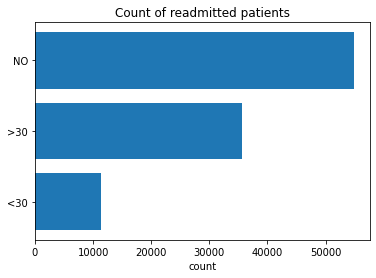

In [12]:
plot_chart(readmitted_count_table,'Count of readmitted patients')

Analizing the target variable readmitted, we can see that we are facing a imbalanced multi-classification problem. where the Category NO represents almost the 54% of the observations which is considerably bigger than the other two categories, and <30 category just represents the 11.16%. This scenario is not a extreme case of a imbalanced dataset as it can be for example a fraud detection problem. However is likely that by using some resampling techniques, we can get a better performance in the models (We will check this techniques later on).

**encounter_id**

In [13]:
col = 'encounter_id'
encounter_id_info_table = get_info_table(df,col)
encounter_id_info_table

,value
% missing_values,0.0
distinct_categories,101766


In [14]:
#check for duplicated values
df[col].duplicated().sum()

0

The encounter_id Variable is going to be useful to identify every row, however this is not going to be a useful variable for the model. the most important aspect to highlight is that there are no duplicated values in this field.

**patient_nbr**

In [15]:
col = 'patient_nbr'
patient_nbr_info_table = get_info_table(df,col)
patient_nbr_info_table

,value
% missing_values,0.0
distinct_categories,71518


In [16]:
#check for duplicated values
df[col].duplicated().sum()

30248

patient_nbr is a variable that will allows  to check if a patient has been treated in the past multiple times. but it is not likely that this variable is going to be used by itself because of its nature.

**race**

In [17]:
col = 'race'
race_info_table = get_info_table(df,col)
race_info_table

,value
% missing_values,2.23
distinct_categories,5


In [18]:
race_count_table = get_count_table(df,id_col,col)
race_count_table

,count,percentage
race,,
Caucasian,76099,76.49
AfricanAmerican,19210,19.31
Hispanic,2037,2.05
Other,1506,1.51
Asian,641,0.64


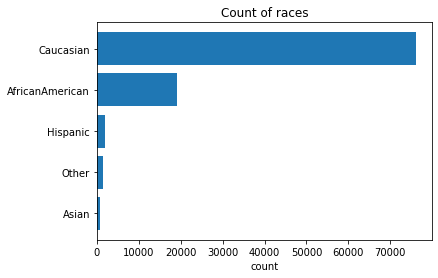

In [19]:
plot_chart(race_count_table,'Count of races')

As we can see, the caucasian race represents the majority of the population. On the other hand, the Asian race just represents the 0.64%. The 2.23% of the values are missing.

In [20]:
# get percentage distribution of each target outcome for every category.
get_cross_table(df,col)

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted,,,,,
<30,11.22,10.14,11.29,10.41,9.63
>30,34.53,25.12,35.64,31.52,29.61
NO,54.25,64.74,53.07,58.08,60.76


Analizing the cross table race, we can suggest that in general the Asian, Hispanic and other patients are less prone to be readmitted in comparison to Caucasian and AfricanAmerican people. However this situation might be due to a lack of enough information because these categories represent less than the 5% of the total population.

**gender**


In [21]:
col = 'gender'
gender_info_table = get_info_table(df,col)
gender_info_table

,value
% missing_values,0.0
distinct_categories,3


In [22]:
gender_count_table = get_count_table(df,id_col,col)
gender_count_table

,count,percentage
gender,,
Female,54708,53.76
Male,47055,46.24
Unknown/Invalid,3,0.00


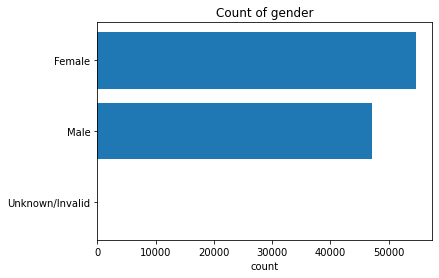

In [23]:
plot_chart(gender_count_table,'Count of gender')

In [24]:
get_cross_table(df,col)

gender,Female,Male,Unknown/Invalid
readmitted,,,
<30,11.25,11.06,0.0
>30,35.68,34.06,0.0
NO,53.08,54.88,100.0


Based on the last information, whe might think that the women tend to be readmitted more often that men. However this difference does not seem considerable. Something else to check is about the Unknown/Invalid category, it just represents 3 observations and it woul be better to handle this as NAN valued instead of a third category.

In [25]:
# replace category unknown/invalid for na
df['gender']=df['gender'].replace('Unknown/Invalid',np.nan)

**Age**

In [26]:
col = 'age'
age_info_table = get_info_table(df,col)
age_info_table

,value
% missing_values,0.0
distinct_categories,10


In [27]:
age_count_table = get_count_table(df,id_col,col)
age_count_table

,count,percentage
age,,
[70-80),26068,25.62
[60-70),22483,22.09
[50-60),17256,16.96
[80-90),17197,16.90
[40-50),9685,9.52
[30-40),3775,3.71
[90-100),2793,2.74
[20-30),1657,1.63
[10-20),691,0.68


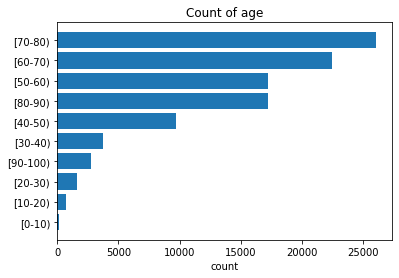

In [28]:
plot_chart(age_count_table,'Count of age')

In [29]:
get_cross_table(df,col)

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
readmitted,,,,,,,,,,
<30,1.86,5.79,14.24,11.23,10.60,9.67,11.13,11.77,12.08,11.10
>30,16.15,32.42,30.78,31.44,33.85,34.29,35.12,36.35,36.19,28.93
NO,81.99,61.79,54.98,57.32,55.55,56.04,53.75,51.88,51.73,59.97


the age field shows that most of the people that have diabetes related problems are those older than 50 years. We can also see that when the age range get bigger, it is more likely that the person will be readmitted except for the 90-100 range, it might be due to the low number of patients in the sample for this category. This field is an ordinal variable wich means it has some hierarchy in the values. the are no missing values.

**weight**

In [30]:
col = 'weight'
age_info_table = get_info_table(df,col)
age_info_table

,value
% missing_values,96.86
distinct_categories,9


Almost the 97% percent of the values in this field are missing. it is likely that this variable will be dropped, because there is no enough information to impute correctly.

**admission_type_id**

According to the information supplied about mapping, we will consider the categories 5 (Not Available), 6 (NULL) and 8 (Not Mapped) as missing values.

In [31]:
dict_missing = {
    5:np.nan,
    6:np.nan,
    8:np.nan,
}

df['admission_type_id'] = df['admission_type_id'].replace(dict_missing)

In [32]:
col = 'admission_type_id'
admission_type_id_info_table = get_info_table(df,col)
admission_type_id_info_table

,value
% missing_values,10.22
distinct_categories,5


In [33]:
admission_type_id_count_table = get_count_table(df,id_col,col)
admission_type_id_count_table

,count,percentage
admission_type_id,,
1.0,53990,59.09
3.0,18869,20.65
2.0,18480,20.23
7.0,21,0.02
4.0,10,0.01


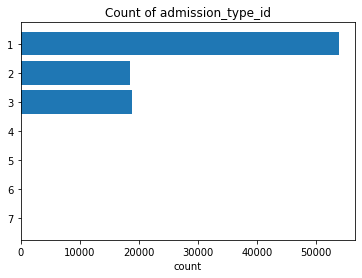

In [34]:
plot_chart(admission_type_id_count_table,'Count of admission_type_id')

In [35]:
get_cross_table(df,col)

admission_type_id,1.0,2.0,3.0,4.0,7.0
readmitted,,,,,
<30,11.52,11.18,10.39,10.0,0.0
>30,35.76,34.91,30.45,20.0,0.0
NO,52.71,53.91,59.16,70.0,100.0


Most of the people that were treated at the hospital related to diabetes issues had an emergency admission type. It's hard to know the influence of this field in the target variable, because all the classes are higly unbalance the differences among classes migth be to a lack of information. there are 10.22% of missing values.

**discharge_disposition_id**

According to the information supplied about mapping, we will consider the categories 18 (NULL), 25 (Not Mapped) and 26 (unkwown/invalid) as missing values.

In [36]:

dict_missing = {
    18:np.nan,
    25:np.nan,
    26:np.nan,
}

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(dict_missing)

In [37]:
col = 'discharge_disposition_id'
discharge_disposition_id_info_table = get_info_table(df,col)
discharge_disposition_id_info_table

,value
% missing_values,4.6
distinct_categories,24


In [38]:
discharge_disposition_id_count_table = get_count_table(df,id_col,col)
discharge_disposition_id_count_table

,count,percentage
discharge_disposition_id,,
1.0,60234,62.04
3.0,13954,14.37
6.0,12902,13.29
2.0,2128,2.19
22.0,1993,2.05
11.0,1642,1.69
5.0,1184,1.22
4.0,815,0.84
7.0,623,0.64


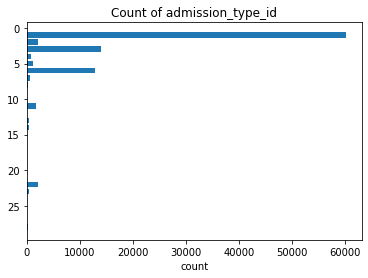

In [39]:
plot_chart(discharge_disposition_id_count_table,'Count of admission_type_id')

In [40]:
get_cross_table(df,col)

discharge_disposition_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,19.0,20.0,22.0,23.0,24.0,27.0,28.0
readmitted,,,,,,,,,,,,,,,,,,,,,
<30,9.30,16.07,14.66,12.76,20.86,12.70,14.45,13.89,42.86,0.00,...,44.44,0.00,0.00,0.0,0.0,27.70,7.28,14.58,0.0,36.69
>30,35.72,31.39,35.23,34.11,29.56,41.56,35.47,35.19,9.52,66.67,...,28.57,54.55,35.71,0.0,0.0,26.04,34.95,33.33,20.0,24.46
NO,54.98,52.54,50.11,53.13,49.58,45.74,50.08,50.93,47.62,33.33,...,26.98,45.45,64.29,100.0,100.0,46.26,57.77,52.08,80.0,38.85


Most of the people were discharged to home. The are a lof of scenarios to consider and analyze. However we can see at glance that the people that are discharged to home are  less likely to be readmitted again, specially in the < 30 day window.

**admission_source_id**

According to the information supplied about mapping, we will consider the categories 15 (Not Available) 17 (NULL), 20 (Not Mapped) and 21 (unkwown/invalid) as missing values.

In [41]:
dict_missing = {
    18:np.nan,
    25:np.nan,
    26:np.nan,
}

df['admission_source_id'] = df['admission_source_id'].replace(dict_missing)

In [42]:
col = 'admission_source_id'
admission_source_id_info_table = get_info_table(df,col)
admission_source_id_info_table

,value
% missing_values,0.0
distinct_categories,16


In [43]:
admission_source_id_count_table = get_count_table(df,id_col,col)
admission_source_id_count_table

,count,percentage
admission_source_id,,
7.0,57494,56.50
1.0,29565,29.05
17.0,6781,6.66
4.0,3187,3.13
6.0,2264,2.22
2.0,1104,1.08
5.0,855,0.84
3.0,187,0.18
20.0,161,0.16


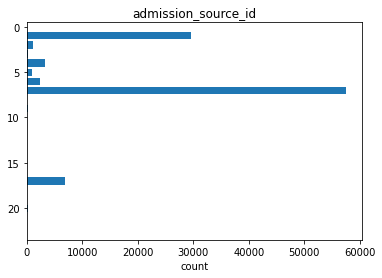

In [44]:
plot_chart(admission_source_id_count_table,'admission_source_id')

In [45]:
get_cross_table(df,col)

admission_source_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,17.0,20.0,22.0
readmitted,,,,,,,,,,,,,,,,
<30,10.59,10.05,15.51,9.70,11.81,9.36,11.69,12.5,10.4,0.0,0.0,0.0,0.0,10.41,13.66,16.67
>30,32.61,28.08,31.02,21.09,27.60,17.58,37.69,25.0,12.8,25.0,0.0,0.0,0.0,36.25,50.31,25.00
NO,56.81,61.87,53.48,69.22,60.58,73.06,50.63,62.5,76.8,75.0,100.0,100.0,100.0,53.34,36.02,58.33


The categories 7 (Emergency room) and 1 (physician referral) are by far the most representative categories in this field. We can see that comparing both of them, the results make sense because the people that were admitted by emergency room are more likely to be readmitted in the future. There are no missing values.

**time_in_hospital**

In [46]:
col = 'time_in_hospital'
time_in_hospital_info_table = get_info_table(df,col,num_flag = True)
time_in_hospital_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [47]:
time_in_hospital_count_table = get_count_table(df,id_col,col)
time_in_hospital_count_table

,count,percentage
time_in_hospital,,
3,17756,17.45
2,17224,16.93
1,14208,13.96
4,13924,13.68
5,9966,9.79
6,7539,7.41
7,5859,5.76
8,4391,4.31
9,3002,2.95


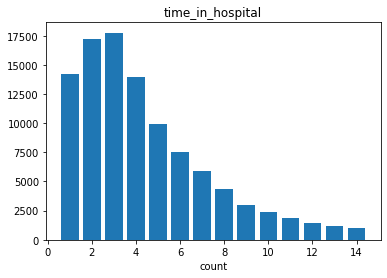

In [48]:
plot_chart(time_in_hospital_count_table,'time_in_hospital',True)

In [49]:
df[col].describe()

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

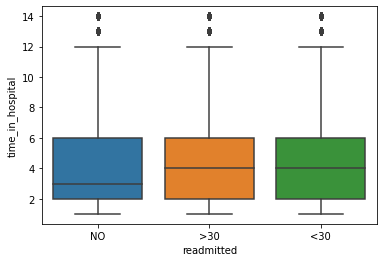

In [50]:
plot_boxplot(df,col)

In this case the time_in_hospital is a discrete variable. in general most of the people tend to be at the hospital shorts periods of time. Analyzing the boxplots we can see that the median of the NO category is lower than the other categories, it migh suggest that the people that stay longer periods of time are more likely to be readmitted.

**payer_code**

In [51]:
col = 'payer_code'
payer_code_id_info_table = get_info_table(df,col)
payer_code_id_info_table

,value
% missing_values,39.56
distinct_categories,17


payer code is a variable with a high percentage of missing values, therefore it will not be analyze because we will drop it in the data processing process

**medical_specialty**


In [52]:
col = 'medical_specialty'
payer_code_id_info_table = get_info_table(df,col)
payer_code_id_info_table

,value
% missing_values,49.08
distinct_categories,72


medical_specialty is a variable with a high percentage of missing values, therefore it will not be analyze because we will drop it in the data processing process.

**num_lab_procedures**

In [53]:
col = 'num_lab_procedures'
num_lab_procedures_info_table = get_info_table(df,col,num_flag = True)
num_lab_procedures_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [54]:
num_lab_procedures_count_table = get_count_table(df,id_col,col)
num_lab_procedures_count_table

,count,percentage
num_lab_procedures,,
1,3208,3.15
43,2804,2.76
44,2496,2.45
45,2376,2.33
38,2213,2.17
...,...,...
120,1,0.00
121,1,0.00
126,1,0.00


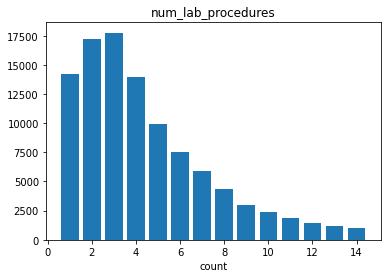

In [55]:
plot_chart(time_in_hospital_count_table,'num_lab_procedures',True)

In [56]:
df[col].describe()

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

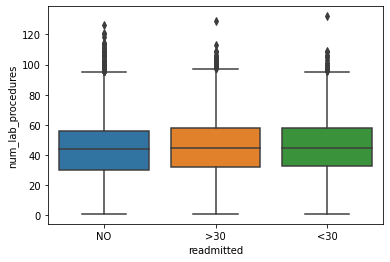

In [57]:
plot_boxplot(df,col)

the variable num_lab_procedures has a right-skewed distribution. when we look closer the boxplot, it does not show any visible insight. because the distribution of the data seems very similar for all te categories. we can observe that there is a considerable amount of outliers. There are no missing values.

**num_procedures**

In [58]:
col = 'num_procedures'
num_procedures_info_table = get_info_table(df,col,num_flag = True)
num_procedures_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [59]:
num_procedures_count_table = get_count_table(df,id_col,col)
num_procedures_count_table

,count,percentage
num_procedures,,
0,46652,45.84
1,20742,20.38
2,12717,12.50
3,9443,9.28
6,4954,4.87
4,4180,4.11
5,3078,3.02


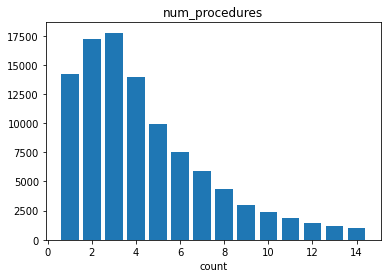

In [60]:
plot_chart(time_in_hospital_count_table,'num_procedures',True)

In [61]:
df[col].describe()

count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64

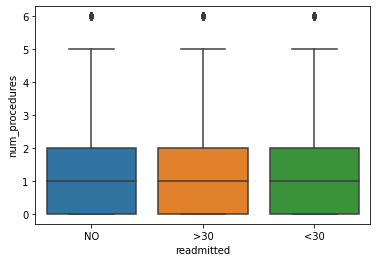

In [62]:
plot_boxplot(df,col)

the variable num_procedures has a right-skewed distribution. when we look closer the boxplot, it does not show any visible insight, because the distribution of the data seems very similar for all te categories.There are no missing values.

**num_medications**

In [63]:
col = 'num_medications'
num_medications_info_table = get_info_table(df,col,num_flag = True)
num_medications_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [64]:
num_medications_count_table = get_count_table(df,id_col,col)
num_medications_count_table

,count,percentage
num_medications,,
13,6086,5.98
12,6004,5.90
11,5795,5.69
15,5792,5.69
14,5707,5.61
...,...,...
70,2,0.00
75,2,0.00
74,1,0.00


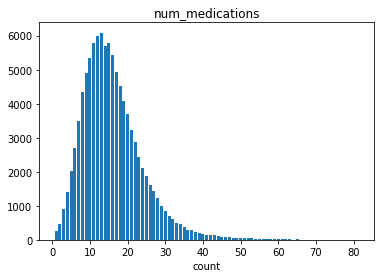

In [65]:
plot_chart(num_medications_count_table,'num_medications',True)

In [66]:
df[col].describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

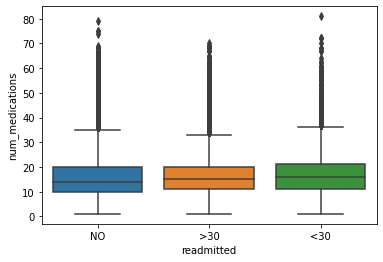

In [67]:
plot_boxplot(df,col)

the variable num_medications has a right-skewed distribution. Analyzing the boxplot we can observe a slight difference in the distribution of the NO category, where the median and the 75% percentile are a lit bit lower than the other categories. This field has a lot of outliers values. There are no missing values.

**number_outpatient**

In [68]:
col = 'number_outpatient'
number_outpatient_info_table = get_info_table(df,col,num_flag = True)
number_outpatient_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [69]:
number_outpatient_count_table = get_count_table(df,id_col,col)
number_outpatient_count_table

,count,percentage
number_outpatient,,
0,85027,83.55
1,8547,8.40
2,3594,3.53
3,2042,2.01
4,1099,1.08
5,533,0.52
6,303,0.30
7,155,0.15
8,98,0.10


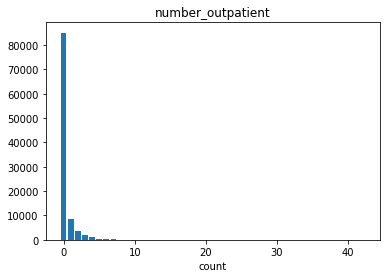

In [70]:
plot_chart(number_outpatient_count_table,'number_outpatient',True)

In [71]:
df[col].describe()

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64

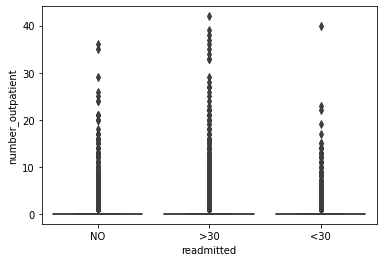

In [72]:
plot_boxplot(df,col)

the variable num_outpatient has a high right-skewed distribution. Analyzing the boxplot we can observe that the boxplot bodies are very small, and there are a lot of outliers. However it is not clear if exists any valuable information.  There are no missing values.

**number_emergency**

In [73]:
col = 'number_emergency'
number_emergency_info_table = get_info_table(df,col,num_flag = True)
number_emergency_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [74]:
number_emergency_count_table = get_count_table(df,id_col,col)
number_emergency_count_table

,count,percentage
number_emergency,,
0,90383,88.81
1,7677,7.54
2,2042,2.01
3,725,0.71
4,374,0.37
5,192,0.19
6,94,0.09
7,73,0.07
8,50,0.05


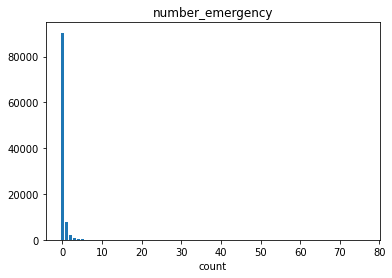

In [75]:
plot_chart(number_emergency_count_table,'number_emergency',True)

In [76]:
df[col].describe()

count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64

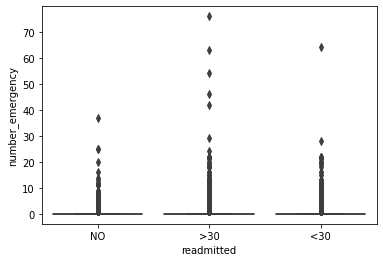

In [77]:
plot_boxplot(df,col)

the variable num_emergency has a high right-skewed distribution. Analyzing the boxplot we can observe that the boxplot bodies are very small, and there are a lot of outliers. However it is not clear if exists any valuable information.  There are no missing values.

**number_inpatient**

In [78]:
col = 'number_inpatient'
number_inpatient_info_table = get_info_table(df,col,num_flag = True)
number_inpatient_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [79]:
number_inpatient_count_table = get_count_table(df,id_col,col)
number_inpatient_count_table

,count,percentage
number_inpatient,,
0,67630,66.46
1,19521,19.18
2,7566,7.43
3,3411,3.35
4,1622,1.59
5,812,0.80
6,480,0.47
7,268,0.26
8,151,0.15


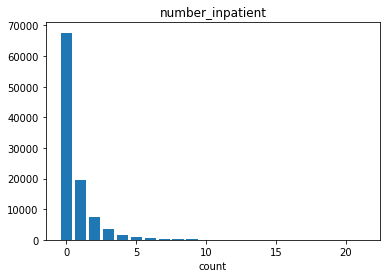

In [80]:
plot_chart(number_inpatient_count_table,'number_inpatient',True)

In [81]:
df[col].describe()

count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64

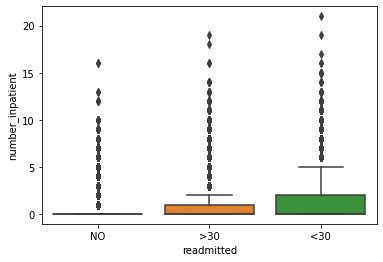

In [82]:
plot_boxplot(df,col)

This variable seems very important because the distribution of the boxplot is very clear, most of the people that were not inpatients were not readmitted. The median and the percentiles are lower than the other categories. There are some outliers. The are no missing values

**diag_1**

In [83]:
col = 'diag_1'
diag_1_info_table = get_info_table(df,col)
diag_1_info_table

,value
% missing_values,0.02
distinct_categories,716


In [84]:
diag_1_count_table = get_count_table(df,id_col,col)
diag_1_count_table

,count,percentage
diag_1,,
428,6862,6.74
414,6581,6.47
786,4016,3.95
410,3614,3.55
486,3508,3.45
...,...,...
832,1,0.00
919,1,0.00
833,1,0.00


It is a high cardinality categorical variable, so it is hard to find some insights by exploring the data manually. The are some missing values.

**diag_2**

In [85]:
col = 'diag_2'
diag_2_info_table = get_info_table(df,col)
diag_2_info_table

,value
% missing_values,0.35
distinct_categories,748


It is a high cardinality categorical variable, so it is hard to find some insights by exploring the data manually. The are some missing values.

In [86]:
diag_2_count_table = get_count_table(df,id_col,col)
diag_2_count_table

,count,percentage
diag_2,,
276,6752,6.66
428,6662,6.57
250,6071,5.99
427,5036,4.97
401,3736,3.68
...,...,...
880,1,0.00
994,1,0.00
811,1,0.00


**diag_3**

In [87]:
col = 'diag_3'
diag_3_info_table = get_info_table(df,col)
diag_3_info_table

,value
% missing_values,1.4
distinct_categories,789


In [88]:
diag_3_count_table = get_count_table(df,id_col,col)
diag_3_count_table

,count,percentage
diag_3,,
250,11555,11.52
401,8289,8.26
276,5175,5.16
428,4577,4.56
427,3955,3.94
...,...,...
E864,1,0.00
E861,1,0.00
E854,1,0.00


It is a high cardinality categorical variable, so it is hard to find some insights by exploring the data manually. The are some missing values.

**number_diagnoses**

In [89]:
col = 'number_diagnoses'
number_diagnoses_info_table = get_info_table(df,col,num_flag = True)
number_diagnoses_info_table

,value
% missing_values,0.0
distinct_categories,N/A


In [90]:
number_diagnoses_count_table = get_count_table(df,id_col,col)
number_diagnoses_count_table

,count,percentage
number_diagnoses,,
9,49474,48.62
5,11393,11.20
8,10616,10.43
7,10393,10.21
6,10161,9.98
4,5537,5.44
3,2835,2.79
2,1023,1.01
1,219,0.22


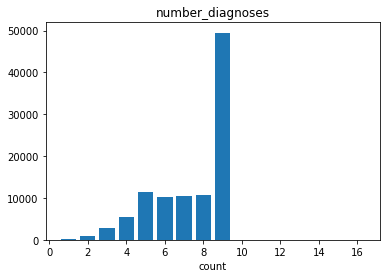

In [91]:
plot_chart(number_diagnoses_count_table,'number_diagnoses',True)

In [92]:
df[col].describe()

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64

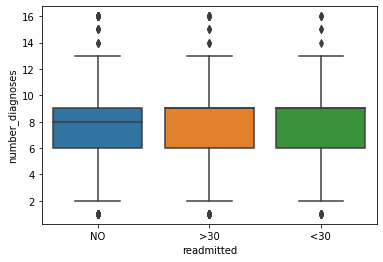

In [93]:
plot_boxplot(df,col)

this variable has a strange behavior, where most of the patients have 9 diagnoses. It migth be related to some bussiness stuff that we do not know. the median of the NO category is consideraby lower than the other categories. there are some outliers, but it is not something to worry about.

**max_glu_serum**

In [94]:
col = 'max_glu_serum'
max_glu_serum_info_table = get_info_table(df,col)
max_glu_serum_info_table

,value
% missing_values,0.0
distinct_categories,4


In [95]:
max_glu_serum_count_table = get_count_table(df,id_col,col)
max_glu_serum_count_table

,count,percentage
max_glu_serum,,
None,96420,94.75
Norm,2597,2.55
>200,1485,1.46
>300,1264,1.24


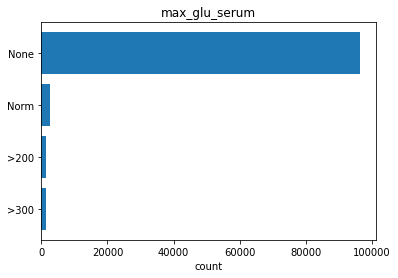

In [96]:
plot_chart(max_glu_serum_count_table,'max_glu_serum')

In [97]:
get_cross_table(df,col)

max_glu_serum,>200,>300,None,Norm
readmitted,,,,
<30,12.46,14.32,11.09,11.36
>30,35.69,41.22,34.86,34.08
NO,51.85,44.46,54.05,54.56


we can conclude from this information that almost the 95% of the patients did not take the the glucosum, serum test. analyzing the distribution vs the target variables, we can suggest that patients with this result above the 200 threshold are more likely to bed readmitted.

**A1Cresult**

In [98]:
col = 'A1Cresult'
A1Cresult_info_table = get_info_table(df,col)
A1Cresult_info_table

,value
% missing_values,0.0
distinct_categories,4


In [99]:
A1Cresult_count_table = get_count_table(df,id_col,col)
A1Cresult_count_table

,count,percentage
A1Cresult,,
None,84748,83.28
>8,8216,8.07
Norm,4990,4.90
>7,3812,3.75


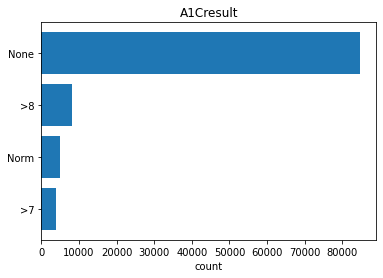

In [100]:
plot_chart(A1Cresult_count_table,'A1Cresult')

In [101]:
get_cross_table(df,col)

A1Cresult,>7,>8,None,Norm
readmitted,,,,
<30,10.05,9.87,11.42,9.66
>30,34.10,35.31,35.10,32.04
NO,55.85,54.82,53.48,58.30


we can conclude from this information that almost the 83% of the patients did not take the the A1C test. the relationship with the target variables in not clear. There are no missing values 

**change**

In [102]:
col = 'change'
change_info_table = get_info_table(df,col)
change_info_table

,value
% missing_values,0.0
distinct_categories,2


In [103]:
change_count_table = get_count_table(df,id_col,col)
change_count_table

,count,percentage
change,,
No,54755,53.8
Ch,47011,46.2


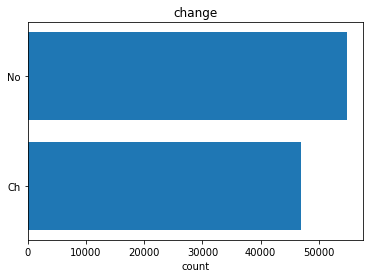

In [104]:
plot_chart(change_count_table,'change')

In [105]:
get_cross_table(df,col)

change,Ch,No
readmitted,,
<30,11.82,10.59
>30,36.74,33.37
NO,51.44,56.04


This is a binary variable with an almost equal value of classes (54% vs 46%). it seems that the patients that did not take this exam were healthier because they were readmitted in a less proportion comparing to the patients that did take it.

**diabetesMed**

In [106]:
col = 'diabetesMed'
A1Cresult_info_table = get_info_table(df,col)
A1Cresult_info_table

,value
% missing_values,0.0
distinct_categories,2


In [107]:
diabetesMed_count_table = get_count_table(df,id_col,col)
diabetesMed_count_table

,count,percentage
diabetesMed,,
Yes,78363,77.0
No,23403,23.0


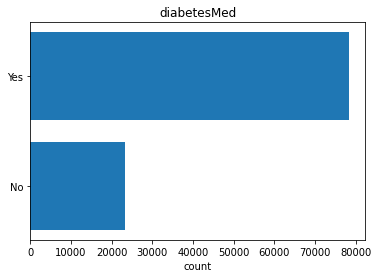

In [108]:
plot_chart(diabetesMed_count_table,'diabetesMed')

In [109]:
get_cross_table(df,col)

diabetesMed,No,Yes
readmitted,,
<30,9.60,11.63
>30,30.88,36.14
NO,59.52,52.24


According to the last graphs, most of the people did take diabetes medicaments (77%). we can observe that the people that was not medicated were less prone to be readmitted because their health status could be better.

**Correlation analysis**

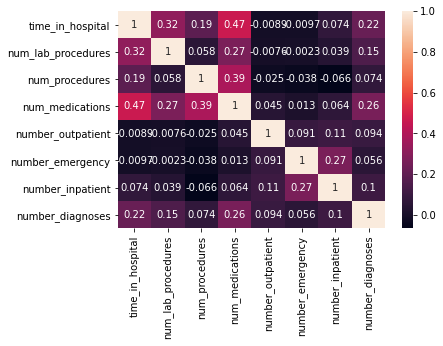

In [110]:
num_cols = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications', 
                  'number_outpatient','number_emergency','number_inpatient','number_diagnoses']
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()


As we can see in the correlation matrix, we can spot some linear relationships between some variables such as the case of time_in_hospital vs num_labd_procedures and num_medications. But in any case the correlation values are not that high.

## 3. Data Preparation

This is one of the most important stages in any machine learning model, because is the step where we use some techniques in order to improve the quality of the data or format the information in order to feed the models.

In [111]:
# Import required libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import  category_encoders as ce


In [112]:
# Define the independent variables and the target variable
X = df.drop('readmitted',axis=1)
y = df['readmitted']

#### Auxiliar functions for data preparation

In [113]:
def get_col_order (df,target_cols):
    '''
    returns the columns order that are going to be used for the column 
    transformer object result
    '''  
    
    other_cols = [x for x in X_train.columns if x not in target_cols]
    col_order = target_cols + other_cols
    
    return col_order




### Training, testing and Validation set

The Dataset will be split in 3 sets:
- **Training (60%)**: This will be the data to train the model
- **Validation (20%)**: This will be the data to evaluate the metrics of  different models in order to find the best one
- **Test (20%)**: This will be the data that we will use to report the results

The utility of the this process is to evaluate the model performance in unknown data in order to check if it is able to generalize well or it is just memorizing the input data. the distribution 60-20-20 is done Because in general the amount of data might be enough for the problem that we want to solve and it is a configuration that has shown good results in the past.

In [114]:
# we split the data and use a random state in order to get reproducible results
# we use the stratify parameter to make sure the distribution of the target variable is the
#the same across all the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y,
                                                    random_state = 17)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25,
                                                  stratify = y_train, random_state = 17) 

### Missing Data Handling

As we can saw in the exploratoy analysis, there are some missing values that have to be handle in order to improve the performance of the model.

- The weight field has almost 97% of missing values and It would make no sense to try to impute de variable, therefore the weight will not give us valuable information for building the model and it should be dropped.

- The payer code and medical specialty variables have a very high percentage of missing values as well (>40%). In this partciular case if the bussiness people consider that this is an important variable, it might be worth to try some advanced imputation technique, using for instance another Machine Learning model to impute this values. However this would be time consuming and it would not guarantee a better performance of the model, so according to this and due to time restrictions, it was decided to drop these variables.

- The race, admission_type_id and discharge_disposition id have less than 10%  of missing values, so the idea would be to impute this values with the mode.

- The gender field does not have a NaN values directly, but it has an equivalent category called Unknown/invalid of just 3 values. In this case we will just impute this values with the mode.

- Diagnosis 1 2 and 3 has between 0% and  1%  of missing values, in this case the business knowledge could suggest that these are cases where this diagnosis does not exist. Therefore Instead of imputing the variable, it might be better just to create another category to group up theses cases.



In [115]:
split_sets = [X_train,X_val,X_test]
cols_to_drop = ['weight','payer_code', 'medical_specialty']

#Eliminate columns
for split_set in split_sets:
    split_set.drop(cols_to_drop,axis=1,inplace=True)    

#Impute variables witrh the mode. we just used the data known in the training set to impute all sets.
cols_to_impute = ['race','gender','admission_type_id','discharge_disposition_id']
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train[cols_to_impute] = imp.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp.transform(X_test[cols_to_impute])

#the diag_3 is imputed with the new code '000' to represent a category without diagnosis
cols_to_impute = ['diag_1','diag_2','diag_3']
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='000')
X_train[cols_to_impute] = imp.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp.transform(X_test[cols_to_impute])



### Data Standardization

when we work with numeric variables, we need to be careful with the scale of them because some based distance algorithms will give more importance to some fields with higher values. it is also true that some models such as the tree based algorithms does not suffer of this problem because of they rely on partitioning techniques.

In this case study we have some fields with different scales. For instance the number of procedures vs time in hospital

According to that, we will standardize the data because it will help in case we use some distance based models and it will not affect the performance of the models that does not need it. It will allows us to use the same data no matter which model we use.

In [116]:
#Define the continuous and the categorical cols
num_cols = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications', 
                  'number_outpatient','number_emergency','number_inpatient','number_diagnoses']

col_order = get_col_order(X_train,num_cols)

In [117]:
# create the column transformer instance
ct = ColumnTransformer([
        ('standard_scaler', StandardScaler(), num_cols)
    ], remainder='passthrough')


#transform data
X_train = pd.DataFrame(ct.fit_transform(X_train),columns = col_order)
X_val = pd.DataFrame(ct.transform(X_val),columns = col_order)
X_test =  pd.DataFrame(ct.transform(X_test),columns = col_order)


### Categorical Variables Encoding

the algorithms in python implementations  do not receive string fields as inputs. For that reason we will encode this variable as numeric representations, using differents techniques as follows:

- **Label_encoding**: it will assign a different number for each category in the target Variable.
- **Ordinal encoding**: it is used in ordinal variables. it will assign a different number for each category in a field but considering an specific order. this is just useful in the cases with the categories have some relationship in terms of size, in this particular case we could use this encoding to the Age variable.
- **One hot encoding**: it is used in categorical variables that does not have any relationship of order between them, creates a new binary variable for each category in a field. it can be problematic if the variable has a high cardinality. Some Machine Learning implementations do not need this kind of encoding, because it is possible to just label encode the values, however, due to the time restrictions, we will encode anyway these variables in order to have the same dataset for all the models and speed up the modeling proccess.we will use this encoding for fields such as race, admission_type_id, discharge_disposition, admission_source_id, max_glu_serum, A1cresult.
- **Target encoding**: it is a technique specially useful in cases where am specific categorical variable has a high cardinality (for example > 100 classes). the idea behind this technique is to replace a  categorical value with the mean of the target variable. it wil be applied to Diagnosis related fields ( > 900 classes).

For the cases where the variables have just 2 possible outcomes. we will just replace them by a binary variable by setting one of the variables as 1 and the other as 0. This will be done in fields such as: gender, change, and diabetesMed . 

In [118]:
# Encode age variable, we will create a dictionary to guarantee an correct ordinal encoding
dict_age = {
    '[0-10)':0,
    '[10-20)':1,
    '[20-30)':2,
    '[30-40)':3,
    '[40-50)':4,
    '[50-60)':5,
    '[60-70)':6,
    '[70-80)':7,
    '[80-90)':8,
    '[90-100)':9,   
}

X_train['age'] = X_train['age'].map(dict_age)
X_val['age'] = X_val['age'].map(dict_age)
X_test['age'] = X_test['age'].map(dict_age)

# we should standardize this variable as well.
scaler = StandardScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_val['age'] = scaler.transform(X_val[['age']])
X_test['age'] = scaler.transform(X_test[['age']])


In [119]:
# one hot encode some variables
initial_index_medications = list(X_train.columns).index('metformin')
target_cols = ['race','admission_type_id','discharge_disposition_id','admission_source_id',
               'max_glu_serum', 'A1Cresult'] + list(X_train.columns[initial_index_medications:-2])


# create the column transform with OneHotEncoder object
# set handle unkown parameter as ignore just in case some classes appear in the test or validation
# sets but not in the training set
ct = ColumnTransformer([
        ('one_hot_encoder', OneHotEncoder(handle_unknown="ignore"), target_cols)
    ], remainder='passthrough')

#Fit data
ct.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['race', 'admission_type_id',
                                  'discharge_disposition_id',
                                  'admission_source_id', 'max_glu_serum',
                                  'A1Cresult', 'metformin', 'repaglinide',
                                  'nateglinide', 'chlorpropamide',
                                  'glimepiride', 'acetohexamide', 'glipizide',
                                  'glyburide', 'tolbutamide', 'pioglitazone',
                                  'rosiglitazone', 'acarbose', 'miglitol',
                                  'troglitazone', 'tolazamide', 'examide',
                                  'citoglipton', 'insulin',
                                  'glyburide-metformin', 'glipizide-metformin',
                                  'glimepiri

In [120]:
# Process to get the feature names
ct.get_feature_names()
dict_one_hot = {f'one_hot_encoder__x{x}':target_cols[x] for x in range(len(target_cols))}
feature_names = []

for feature_name in ct.get_feature_names():
    for prefix_old,prefix_new in dict_one_hot.items():
        if prefix_old in feature_name:
            feature_name = feature_name.replace(prefix_old.lower(), prefix_new)            
    feature_names.append(feature_name)

In [121]:
#create dummy variables  and update dataframes
X_train = pd.DataFrame(ct.transform(X_train),columns = feature_names)
X_val = pd.DataFrame(ct.transform(X_val),columns = feature_names)
X_test = pd.DataFrame(ct.transform(X_test),columns = feature_names)

In [122]:
#Define Target variables
target_cols = ['diag_1','diag_2','diag_3']

y_train=y_train.astype(str)   #convert to string to onehot encode
enc=ce.OneHotEncoder().fit(y_train)
y_train_onehot=enc.transform(y_train)
class_names=y_train_onehot.columns  #names of onehot encoded columns
X_train_obj=X_train[target_cols].copy() #separate categorical columns
X_val_obj=X_val[target_cols].copy() #separate categorical columns
X_test_obj=X_test[target_cols].copy() #separate categorical columns
X_train.drop(target_cols,axis=1,inplace=True)
X_val.drop(target_cols,axis=1,inplace=True)
X_test.drop(target_cols,axis=1,inplace=True)

for class_ in class_names:
    #fit the encoder
    enc=ce.TargetEncoder()
    enc.fit(X_train_obj,y_train_onehot[class_]) #convert all categorical 
    
    #transform_data
    temp=enc.transform(X_train_obj)       #columns for class_
    temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
    X_train=pd.concat([X_train,temp],axis=1)    #add to original dataset
    
    #transform_data
    temp=enc.transform(X_val_obj)       #columns for class_
    temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
    X_val=pd.concat([X_val,temp],axis=1)    #add to original dataset
    
    #transform_data
    temp=enc.transform(X_test_obj)       #columns for class_
    temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
    X_test=pd.concat([X_test,temp],axis=1)    #add to original dataset
    




In [123]:
X_train.iloc[:5,-9:]

,diag_1_readmitted_1,diag_2_readmitted_1,diag_3_readmitted_1,diag_1_readmitted_2,diag_2_readmitted_2,diag_3_readmitted_2,diag_1_readmitted_3,diag_2_readmitted_3,diag_3_readmitted_3
0,0.349880,0.351107,0.370897,0.538030,0.526661,0.520788,0.112090,0.122231,0.108315
1,0.346667,0.376307,0.352665,0.580000,0.506969,0.535005,0.073333,0.116725,0.112330
2,0.368669,0.336828,0.363281,0.499411,0.546527,0.511719,0.131920,0.116645,0.125000
3,0.378333,0.344660,0.352665,0.510000,0.538835,0.535005,0.111667,0.116505,0.112330
4,0.384106,0.360033,0.306122,0.503311,0.531263,0.653061,0.112583,0.108705,0.040816


In [124]:
# fill missing values generated by target encoding
cols_to_impute = list(X_train.columns[-9:])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[cols_to_impute] = imp.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imp.transform(X_test[cols_to_impute])

In [125]:
#Encode Binary variables
target_cols = ['gender','change','diabetesMed']
le = LabelEncoder()

for target_col in target_cols:
    X_train[target_col] = le.fit_transform(X_train[target_col])
    X_val[target_col] = le.transform(X_val[target_col])
    X_test[target_col] = le.transform(X_test[target_col])

In [126]:
# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

### Variable Selection

The variable selection stage is pretty important in any machine Learning problem. In this particular case, we will do some clarifications as follows:
- the encounter_id and patient_nbr are id columns that are not going to add valuable information to the model, so we should drop them.
- we could try come iteration processes such as forward or backward selection or to use the lasso regularization technique. However this is a very time consuming task, so it will not possible to use in this case.
- Sometimes is useful to drop variables with high correlations in order to avoid multicollinearity problems. In this case the linear relationships are not that strong, so it might not be a good idea to do it, however we could check other kind of correlations such as kendal or spearman. Even we could explor some relationships between numeric and categorical variables using point biserial correlation
- In this particular scenario the idea would be to use some algorithms that have built-in capablities to select variables such as tree based algorithms.

In [127]:
cols_to_drop = ['encounter_id','patient_nbr']

X_train.drop(cols_to_drop,axis=1,inplace=True)  
X_val.drop(cols_to_drop,axis=1,inplace=True)   
X_test.drop(cols_to_drop,axis=1,inplace=True)   

## 4. Modeling

In order to try to solve this study case. we will  use some trees based algorithms such as random_forest, gradient boosting and LightGBM. Because in the literature they have shown a pretty good performance to solve these classification problems, specially in cases like this with some mixed data types, high amount of variables and they are robust to outliers. In the future it could be worth to try some deep learning algorithms, however these kind of algorithms require more time to train and a lof of information.

#### Metrics to evaluate

we will have to use some classification metrics in order to compare the results of the model in the validation tests. In this case we will try to maximize the **F-score**, because we want to find a balance between the precision and the recall. However in case we would like to try something else that does not depend on a treshold, the **PR-AUC** (precision-recall) would be a great choice, specially in unbalanced datasets like this one. This could be done in future iterations.

In [146]:
#import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report,f1_score,confusion_matrix
import pickle


#### Resampling techniques

the unbalanced data problems like this one, can be problematic for finding an optimal solutions, because the structure of the data can cause some biases on the learning process of the model. To face these problems it is possible to use some resampling techniques where the idea behind this is to balance the classes in the training set.

- **Oversampling**: the idea is to add new observations to the minority class.
- **Undersampling**: the idea is to remove observations from the majority class.

For this particular case. we will use an oversampling technique called **SMOTE**, where the main objective is to create synthetic data based on the existing data in order to add observations to the minority classes. the final participation of the classes does not need to be equal, we could iterate over multiple possibilities to find the best one, however, in this case we will look for the same participation across the classes.

In [129]:
#Calculate the count of the majority class
max_majority_class = max(pd.Series(y_train).value_counts())

#Calculate the indexes of the categorical columns
num_cols = ['age','time_in_hospital','num_lab_procedures','num_procedures','num_medications', 
                  'number_outpatient','number_emergency','number_inpatient',
             'number_diagnoses'] + list(X_train.columns[-9:])

index_cat_cols = [X_train.columns.get_loc(i) for i in X_train.columns if i not in num_cols]

#Create a dictionary to feed the SMOTE technique
dict_smote = {0: max_majority_class, 1: max_majority_class, 2:max_majority_class}
smotenc = SMOTENC(
            categorical_features=index_cat_cols,
            sampling_strategy=dict_smote,
            random_state=17,
        )
X_train,y_train = smotenc.fit_resample(X_train,y_train)



In [130]:
#convert types to float in order to avoid errors in some models
X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

In [131]:
#Create a list of models

models_name = ['logistic_regression','random_forest','gradient_boosting','light_gbm']
models = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
          LGBMClassifier()]

models_dict ={}

for model_name,model in zip(models_name,models):
    clf = model
    clf.fit(X_train,y_train)
    models_dict[model_name] = clf
          

In [132]:
#calculate F_score for each model in train and test

f_score_list = []

for model_name,model in models_dict.items():
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    f_score_train = round(f1_score(y_train,predictions_train,average = 'weighted'),4)
    f_score_val = round(f1_score(y_val,predictions_val,average = 'weighted'),4)
    f_score_list.append((f_score_train,f_score_val))

#Create dataframe to compare the results
rows_list = []
for model_name,f_score in zip(models_name,f_score_list):
    row_list = [model_name,f_score[0],f_score[1]]
    rows_list.append(row_list)
    
df_f1 = pd.DataFrame(rows_list,columns = ['model_name','f1_score_train','f1_score_val'])
df_f1
    
    

    

,model_name,f1_score_train,f1_score_val
0,logistic_regression,0.5603,0.5297
1,random_forest,1.0000,0.5429
2,gradient_boosting,0.5972,0.5483
3,light_gbm,0.6525,0.5526


As we can see in the result table, the algorithm that is getting the best F1_score is LightGBM. We can also observe that all the models are overfitting because the difference between the f score in the training set and validation set is considerable. To face this scenario we could use some techniques such as: regularization or K-fold Cross validation. due to time restrictions, we will try to reduce this overfitting through hyperparameters

#### Hyperparameter Tuning

The idea will be to try out different configurations of the hyperparameters in order to find the best model. the ideal case would be to try out all the models with a grid search, however due to the time restrictions, we will do it just for the best base model (lightgbm) and using a randomized search.

In [154]:
#define parameters for the search

params = {
    'learning_rate': [0.01,0.05,0.1,0.15],
    'n_estimators': [10,20,40,70,100,150,200,300,400],
    'num_leaves': [20,24,28,32,34,36],
    'boosting_type' : ['gbdt', 'dart','goss'],
    'random_state' : [17],
    'subsample' : [0.6,0.7,0.8,0.9,1],
    'reg_alpha' : [0,1,1.2],
    'reg_lambda' : [0,1,1.2,1.4],
    }

In [155]:
# define the random search for LGBM and save the model in pickle
clf = RandomizedSearchCV(LGBMClassifier(),params,n_iter=100,
                    random_state=17,scoring='f1_weighted',n_jobs=-1,verbose=2,cv=3)
clf.fit(X_train,y_train)

filename = 'lgbm_search.sav'
pickle.dump(clf, open(filename, 'wb'))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [141]:
lgbm_search=pickle.load(open('lgbm_search.sav','rb'))
predictions = lgbm_search.predict(X_val)
f1_score_value = round(f1_score(y_val,predictions,average = 'weighted'),4)
print( f' the f_score value in test is:{f1_score_value}\n')
print(classification_report(y_val,predictions))

 the f_score value in test is:0.5536

              precision    recall  f1-score   support

           0       0.37      0.07      0.12      2271
           1       0.50      0.43      0.46      7109
           2       0.63      0.79      0.70     10973

    accuracy                           0.59     20353
   macro avg       0.50      0.43      0.43     20353
weighted avg       0.56      0.59      0.55     20353



As we can see with the Hyperparameter tunning we enhance the initial model  in terms of the f_score results (0.5536 > 0.5526). It is not the biggest improvement, but with more iterations and time it might be even better.

## 5. Evaluation

After getting the best possible parameters, we will predict the targets in the testing set in order to generate the final results

In [142]:
predictions = lgbm_search.predict(X_test) 
f1_score_value = round(f1_score(y_test,predictions,average = 'weighted'),4)
print( f' the f_score value in test is:{f1_score_value}\n')
print(classification_report(y_test,predictions))


 the f_score value in test is:0.5481

              precision    recall  f1-score   support

           0       0.35      0.07      0.11      2272
           1       0.49      0.42      0.45      7109
           2       0.63      0.79      0.70     10973

    accuracy                           0.58     20354
   macro avg       0.49      0.43      0.42     20354
weighted avg       0.55      0.58      0.55     20354



### Interpretation of the results

Analyzing the last results we can conclude some things as follows:
- in the 63% of the cases that the models says a patient was not goint to be readmitted, the model was right.
- in the 49%% of the cases that the models says a patient was going to be  readmitted in more than 30 days , the model was right.
- in the 35% of the cases that the models says a patient was going to be  readmitted in less than 30 days, the model was right.

- the 79% of the cases true no readmitted patients were captured by the model.
- the 42% of the cases true readmitted >30 patients were captured by the model.
- the 7% of the cases true readmitted <30 patients were captured by the model.


## 6. Conclusions

- Unbalanced clasiffication problems are hard to face because is hard to handle the nature of this data in Machine Learning models
- This is a baseline model, however it can be improved trying out a lot of different possible things:
    - To get more data and fields in order to create new variables that can feed the model
    - To use some outlier detection tecniques such as mahalnobis distance and minimun covariance determinant.
    - To use some variable selection tecniques
    - To try some regularization techniques to try avoid overfitting.
    - To use some algorithms for dimensionality reduction such  as PCA.
    - To Try more algorithms and use hyperparameter tuning in all of them.

# By santiago Giraldo Ardila